In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [5]:
df = pd.read_csv('Sales_Performance_Intermediate.csv')
df.head()

,OrderID,OrderDate,Region,Product,Category,Quantity,Price,Sales,Profit
0,1001,2023-01-01,North,Laptop,Electronics,1,60000,60000,12000
1,1002,2023-01-08,South,Mobile,Electronics,2,20000,40000,8000
2,1003,2023-01-15,East,Tablet,Electronics,3,30000,90000,18000
3,1004,2023-01-22,West,Headphones,Accessories,1,2000,2000,400
4,1005,2023-01-29,North,Monitor,Electronics,2,15000,30000,6000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderID    50 non-null     int64 
 1   OrderDate  50 non-null     object
 2   Region     50 non-null     object
 3   Product    50 non-null     object
 4   Category   50 non-null     object
 5   Quantity   50 non-null     int64 
 6   Price      50 non-null     int64 
 7   Sales      50 non-null     int64 
 8   Profit     50 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 3.6+ KB


In [8]:
df.shape

(50, 9)

In [9]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning & Preparation

In [6]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        50 non-null     int64         
 1   OrderDate      50 non-null     datetime64[ns]
 2   Region         50 non-null     object        
 3   Product        50 non-null     object        
 4   Category       50 non-null     object        
 5   Quantity       50 non-null     int64         
 6   Price          50 non-null     int64         
 7   Sales          50 non-null     int64         
 8   Profit         50 non-null     int64         
 9   month          50 non-null     object        
 10  Profit_margin  50 non-null     float64       
 11  Month          50 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 4.6+ KB


# Create Month column

In [9]:
df['Month'] = df['OrderDate'].dt.month
df.head(3)

,OrderID,OrderDate,Region,Product,Category,Quantity,Price,Sales,Profit,Month
0,1001,2023-01-01,North,Laptop,Electronics,1,60000,60000,12000,1
1,1002,2023-01-08,South,Mobile,Electronics,2,20000,40000,8000,1
2,1003,2023-01-15,East,Tablet,Electronics,3,30000,90000,18000,1


# Feature Engineering

In [7]:
#Verify Sales Calculation
(df['Quantity']*df['Price']).equals(df['Sales'])

True

In [55]:
#Create Profit Margin
df['Profit_margin'] = df['Profit']/df['Sales']
df.head()

,OrderID,OrderDate,Region,Product,Category,Quantity,Price,Sales,Profit,month,Profit_margin,Month
0,1001,1970-01-01 00:00:00.000000001,North,Laptop,Electronics,1,60000,60000,12000,01,0.2,1
1,1002,1970-01-01 00:00:00.000000001,South,Mobile,Electronics,2,20000,40000,8000,01,0.2,1
2,1003,1970-01-01 00:00:00.000000001,East,Tablet,Electronics,3,30000,90000,18000,01,0.2,1
3,1004,1970-01-01 00:00:00.000000001,West,Headphones,Accessories,1,2000,2000,400,01,0.2,1
4,1005,1970-01-01 00:00:00.000000001,North,Monitor,Electronics,2,15000,30000,6000,01,0.2,1


# Sales Analysis

In [10]:
#totalsales and profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

total_sales, total_profit


(np.int64(2220000), np.int64(444000))

In [13]:
#Monthly Sales Trend
month_sales = df.groupby('Month')['Sales'].sum()
month_sales

,Sales
Month,
1,222000
2,192000
3,220000
4,222000
5,132000
6,182000
7,222000
8,162000
9,192000


In [13]:
month_profit = df.groupby('month')['Profit'].sum()
month_profit

,Profit
month,
01,44400
02,38400
03,44000
04,44400
05,26400
06,36400
07,44400
08,32400
09,38400


In [14]:
#Sales by Region
sales_by_region =df.groupby('Region')['Sales'].sum()
sales_by_region

,Sales
Region,
East,900000
North,900000
South,400000
West,20000


In [15]:
#Top 5 Products by Sales
top5_product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)
top5_product_sales

,Sales
Product,
Tablet,900000
Laptop,600000
Mobile,400000
Monitor,300000
Headphones,20000


In [33]:
#Category-wise Profit
category_profit = df.groupby('Category')['Profit'].sum()
category_profit

,Profit
Category,
Accessories,4000
Electronics,440000


# Visualization

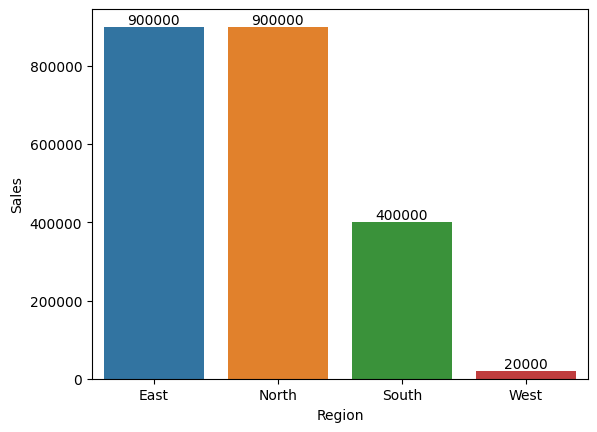

In [22]:
#Sales by Region
sales_by_region =df.groupby('Region')['Sales'].sum().reset_index()
ax = sns.barplot(x ='Region',y = 'Sales',data = sales_by_region, hue = 'Region' )
for i in ax.containers:
  ax.bar_label(i)

Text(0.5, 1.0, 'Monthly Sales Trend')

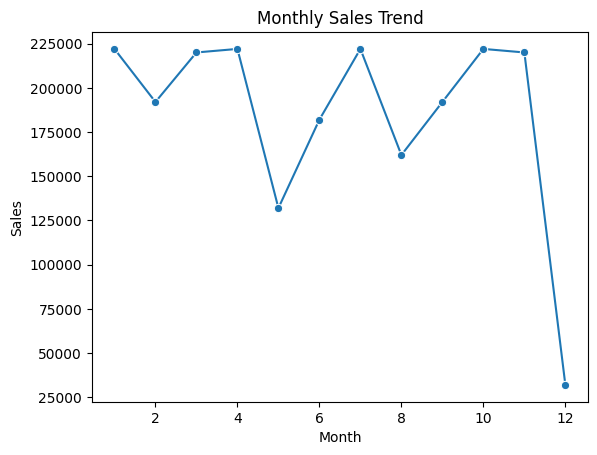

In [18]:
#Monthly Sales Trend
total_sales = df.groupby('Month')['Sales'].sum().reset_index()
sns.lineplot(x='Month',y="Sales",data= total_sales,marker='o')
plt.title("Monthly Sales Trend")


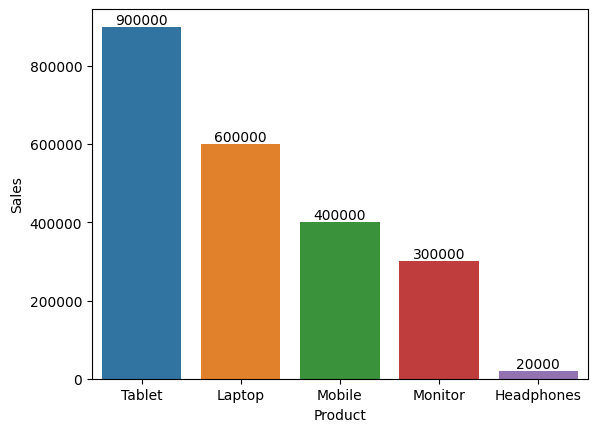

In [32]:
#Top Products
top5_product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False).reset_index()
ax = sns.barplot(x = 'Product',y = 'Sales',data = top5_product_sales,hue = 'Product')
for  i in ax.containers:
  ax.bar_label(i)

# *Business Insights

📊 Key Findings

1.  East & North region generates maximum revenue

2. tablets drive the highest sales

3. Electronics category is most profitable

4. Sales fluctuate month-wise → seasonality

# -> Business Recommendation

*Increase inventory for high-selling products

*Focus marketing on North & South regions

*Improve promotions in low-performing month

